In [2]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import polars as pl

pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)
pl.Config.set_fmt_float("full")
pl.Config.set_float_precision(3)
pl.Config.set_thousands_separator("_")
pl.Config.set_tbl_cell_numeric_alignment("RIGHT")


@dataclass
class Params:
    EL_T: float
    EL_F: float
    BS_T: float


P1 = Params(1, 1, 2)
P2 = Params(1, 3, 1.3)
P3 = Params(1, 50, 1)
P4 = Params(2, 20, 2)

In [3]:
BS.call(20000, 20000, 0.8, np.repeat(1.0 / 365, 10))
BS.put(20000, 20000, 0.8, np.repeat(1.0 / 365, 10))

array([334.08108534, 334.08108534, 334.08108534, 334.08108534,
       334.08108534, 334.08108534, 334.08108534, 334.08108534,
       334.08108534, 334.08108534])

In [9]:
# case of Strike = 0

wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(
    2, 10000, 20000, 1, 0.8, 300000
)
ccall = ELC.call(2, 20000, 1, 0.8)
cput = ELC.put(2, 20000, 1, 0.8)

po_call = np.maximum(0, 20000 - 1)
po_put = np.maximum(0, 1 - 20000)

print(wtime)
print(
    "Continous",
    (ccall, cput, ccall - po_call, cput - po_put),
)
print("weighted", (wcall, wput, wcall - po_call, wput - po_put))
print("cashflow", (mcall, mput))

2.0001999999934155
Continous (np.float64(19999.0), np.float64(5.43243919590644e-103), np.float64(0.0), np.float64(5.43243919590644e-103))
weighted (np.float64(19998.999999984608), np.float64(4.505683554397126e-219), np.float64(-1.5392288332805037e-08), np.float64(4.505683554397126e-219))
cashflow (np.float64(19998.999999992186), np.float64(4.5056835543978866e-219))


In [7]:
wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(
    2, 10000, 20000, 20000, 0.8, 300000
)
ccall = ELC.call(2, 20000, 20000, 0.8)
cput = ELC.put(2, 20000, 20000, 0.8)
print(wtime)
print(
    "Continous",
    (ccall, cput),
)
print("weighted", (wcall, wput))
print("cashflow", (mcall, mput))

2.0001999999934155
Continous (np.float64(418.64738979366564), np.float64(418.64738979366564))
weighted (np.float64(418.6786854063061), np.float64(418.67868540630616))
cashflow (np.float64(418.6786854063116), np.float64(418.6786854063116))


In [8]:
# wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(1, 1, 20000, 20000, 0.8, 20)
# wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(1, 2, 20000, 20000, 0.8, 30)
# wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(1, 3, 20000, 20000, 0.8, 100)
# wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(1, 4, 20000, 20000, 0.8, 100)
# wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(1, 10, 20000, 20000, 0.8, 100)

# wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(2, 10, 20000, 20000, 0.8, 300)
# wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(2, 30, 20000, 20000, 0.8, 300)
# wtime, wcall, wput, time_weight, mcall, mput, _, _ = EL.replicate(2, 100, 20000, 20000, 0.8, 3000)

print(wtime)
pl.DataFrame(time_weight.transpose(), schema=["time", "weight"]).group_by(
    ((pl.col("time") * 10).round() // 10).round().alias("new_time") + 1
).agg(pl.col("weight").sum(), pl.col("weight").len().alias("len")).sort(
    "new_time"
).filter(pl.col("new_time") < 20).plot.bar(x="new_time", y="weight")


2.0001999999934155


alt.Chart(...)

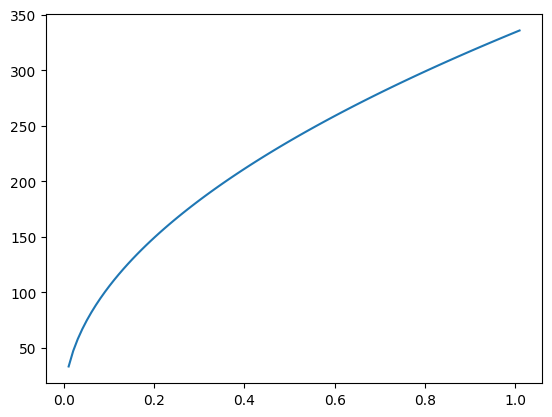

225.42838550582763


In [9]:
fig, ax = plt.subplots()

ax.plot(
    np.linspace(1 / 100, 1.01, 100),
    BS.call(20000, 20000, 0.8, np.linspace(1 / 100, 1.01, 100) / 365),
    label="BS call",
)
plt.show()

print((BS.call(20000, 20000, 0.8, np.linspace(1 / 100, 1.01, 100) / 365) * 0.01).sum())

In [10]:
print(EL.replicate(1, 2, 20000, 20000, 0.8, 23)[:3])
print(EL.replicate(2, 20, 20000, 20000, 0.8, 230)[:3])

(np.float64(1.4988416377547598), np.float64(382.04390626778047), np.float64(382.04390626778047))
(np.float64(2.0996641580557935), np.float64(433.1988768112894), np.float64(433.1988768112893))


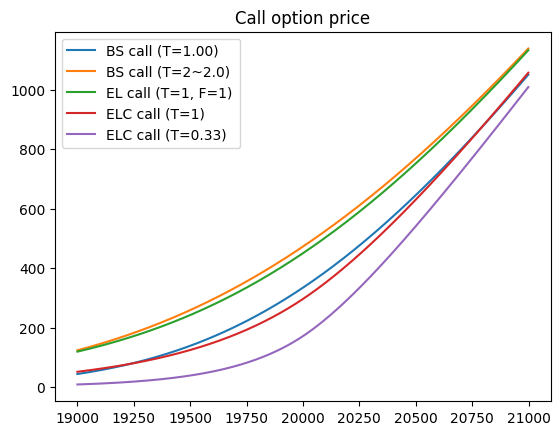

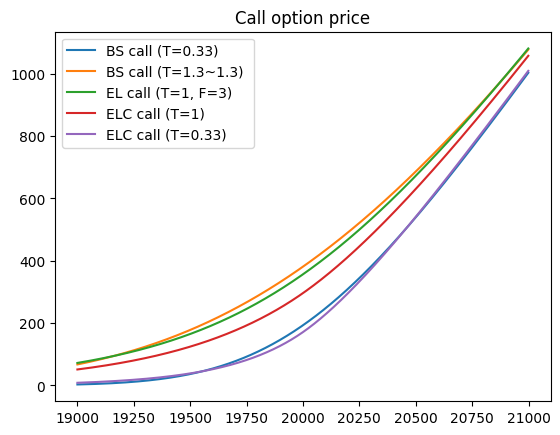

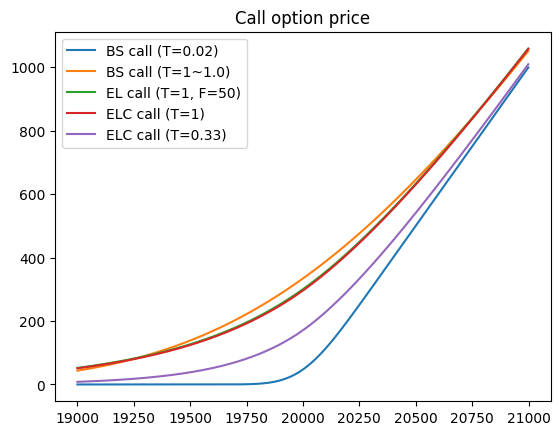

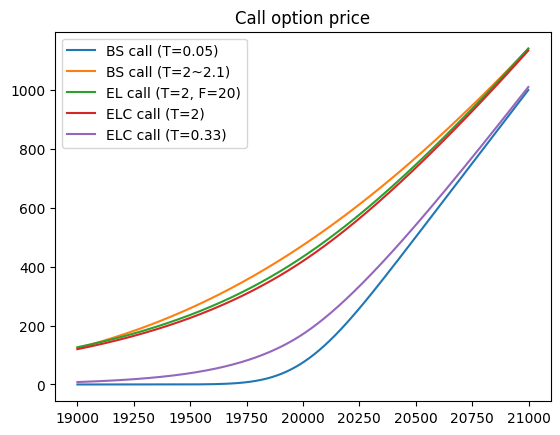

In [ ]:
for P in [P1, P2, P3, P4]:
    BS_T = EL.replicate(P.EL_T, P.EL_F, 20000, 20000, 0.8, int(P.EL_F * 100))[0]
    fig, ax = plt.subplots()
    ax.plot(
        np.arange(19000, 21000),
        BS.call(np.arange(19000, 21000), 20000, 0.8, 1 / P.EL_F / 365),
        label=f"BS call (T={1 / P.EL_F:.2f}) ",
    )
    ax.plot(
        np.arange(19000, 21000),
        BS.call(np.arange(19000, 21000), 20000, 0.8, P.BS_T / 365),
        label=f"BS call (T={P.BS_T}~{round(BS_T, 1)}) ",
    )
    ax.plot(
        np.arange(19000, 21000),
        [
            EL.replicate(P.EL_T, P.EL_F, S, 20000, 0.8, int(P.EL_F * 100))[1]
            for S in np.arange(19000, 21000)
        ],
        label=f"EL call (T={P.EL_T}, F={P.EL_F})",
    )
    ax.plot(
        np.arange(19000, 21000),
        ELC.call(P.EL_T, np.arange(19000, 21000), 20000, 0.8),
        label=f"ELC call (T={P.EL_T})",
    )
    ax.plot(
        np.arange(19000, 21000),
        ELC.call(1 / 3, np.arange(19000, 21000), 20000, 0.8),
        label=f"ELC call (T={0.33})",
    )
    ax.legend()
    ax.set_title("Call option price")

    plt.show()

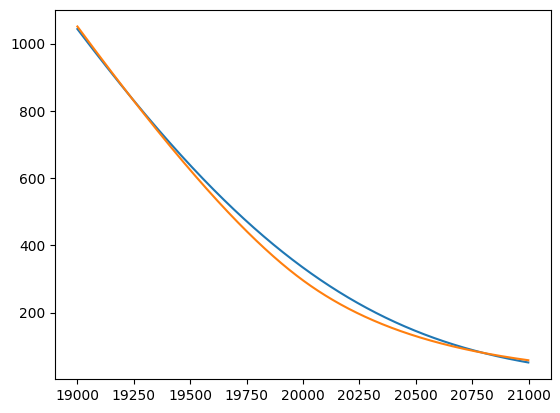

In [12]:
fig, ax = plt.subplots()

ax.plot(
    np.arange(19000, 21000),
    BS.put(np.arange(19000, 21000), 20000, 0.8, 1.0 / 365),
    label="BS put",
)
ax.plot(
    np.arange(19000, 21000),
    ELC.put(1, np.arange(19000, 21000), 20000, 0.8),
    label="ELC put",
)
plt.show()

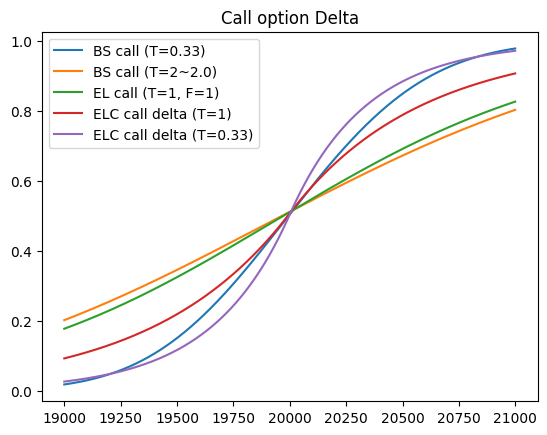

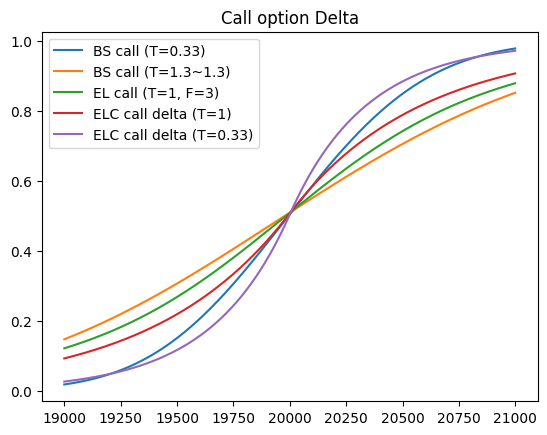

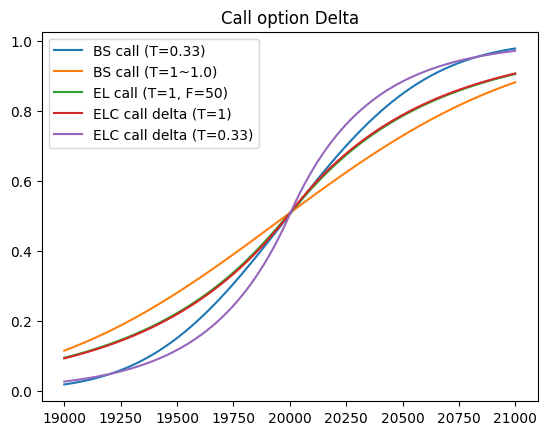

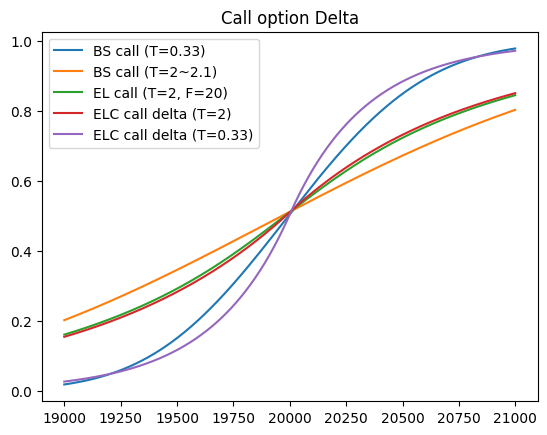

In [20]:
for P in [P1, P2, P3, P4]:
    BS_T = EL.replicate(P.EL_T, P.EL_F, 20000, 20000, 0.8, int(P.EL_F * 100))[0]
    fig, ax = plt.subplots()
    ax.plot(
        np.arange(19000, 21000),
        BS.delta(np.arange(19000, 21000), 20000, 0.8, 1 / 3 / 365, "call"),
        label=f"BS call (T={0.33}) ",
    )
    ax.plot(
        np.arange(19000, 21000),
        BS.delta(np.arange(19000, 21000), 20000, 0.8, P.BS_T / 365, "call"),
        label=f"BS call (T={P.BS_T}~{round(BS_T, 1)}) ",
    )
    ax.plot(
        np.arange(19000, 21000),
        [
            (
                EL.replicate(P.EL_T, P.EL_F, S + 1, 20000, 0.8, int(P.EL_F * 100))[1]
                - EL.replicate(P.EL_T, P.EL_F, S - 1, 20000, 0.8, int(P.EL_F * 100))[1]
            )
            / 2
            for S in np.arange(19000, 21000)
        ],
        label=f"EL call (T={P.EL_T}, F={P.EL_F})",
    )
    ax.plot(
        np.arange(19000, 21000),
        ELC.delta(P.EL_T, np.arange(19000, 21000), 20000, 0.8),
        label=f"ELC call delta (T={P.EL_T})",
    )
    ax.plot(
        np.arange(19000, 21000),
        ELC.delta(1 / 3, np.arange(19000, 21000), 20000, 0.8),
        label=f"ELC call delta (T={0.33})",
    )
    ax.legend()
    ax.set_title("Call option Delta")

    plt.show()

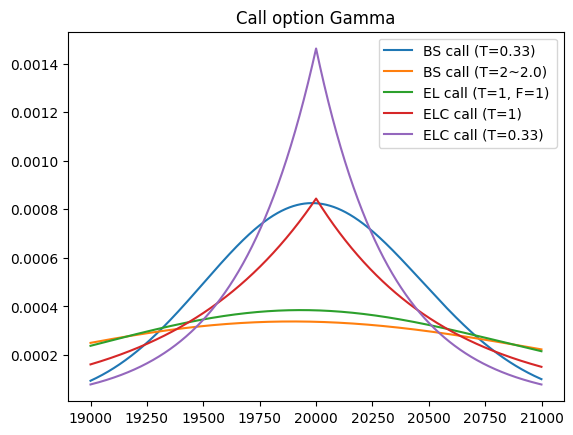

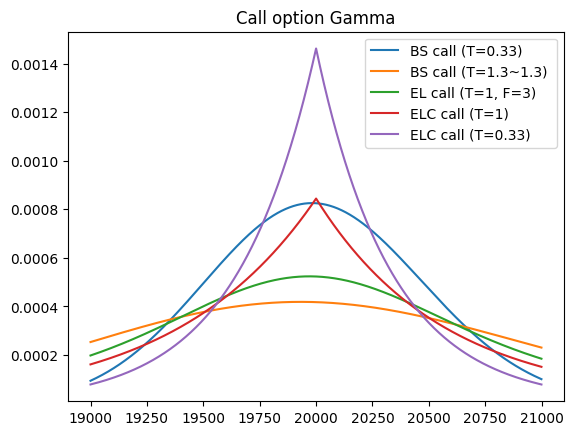

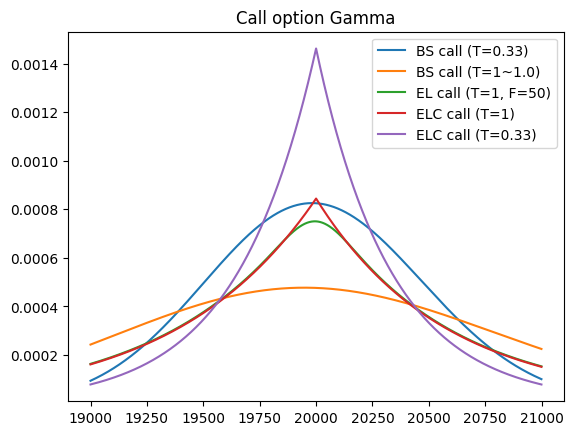

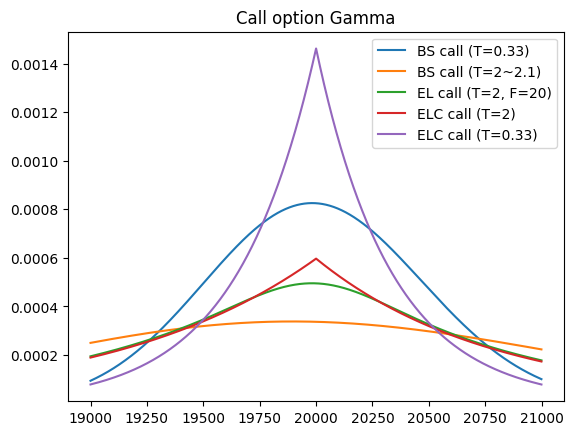

In [21]:
for P in [P1, P2, P3, P4]:
    BS_T = EL.replicate(P.EL_T, P.EL_F, 20000, 20000, 0.8, int(P.EL_F * 100))[0]
    fig, ax = plt.subplots()
    ax.plot(
        np.arange(19000, 21000),
        BS.gamma(np.arange(19000, 21000), 20000, 0.8, 1 / 3 / 365),
        label=f"BS call (T={0.33}) ",
    )
    ax.plot(
        np.arange(19000, 21000),
        BS.gamma(np.arange(19000, 21000), 20000, 0.8, P.BS_T / 365),
        label=f"BS call (T={P.BS_T}~{round(BS_T, 1)}) ",
    )
    ax.plot(
        np.arange(19000, 21000),
        [
            (
                EL.replicate(P.EL_T, P.EL_F, S - 1, 20000, 0.8, int(P.EL_F * 100))[1]
                - 2 * EL.replicate(P.EL_T, P.EL_F, S, 20000, 0.8, int(P.EL_F * 100))[1]
                + EL.replicate(P.EL_T, P.EL_F, S + 1, 20000, 0.8, int(P.EL_F * 100))[1]
            )
            / 1
            for S in np.arange(19000, 21000)
        ],
        label=f"EL call (T={P.EL_T}, F={P.EL_F})",
    )
    ax.plot(
        np.arange(19000, 21000),
        ELC.gamma(P.EL_T, np.arange(19000, 21000), 20000, 0.8),
        label=f"ELC call (T={P.EL_T})",
    )
    ax.plot(
        np.arange(19000, 21000),
        ELC.gamma(1 / 3, np.arange(19000, 21000), 20000, 0.8),
        label=f"ELC call (T={0.33})",
    )
    ax.legend()
    ax.set_title("Call option Gamma")

    plt.show()

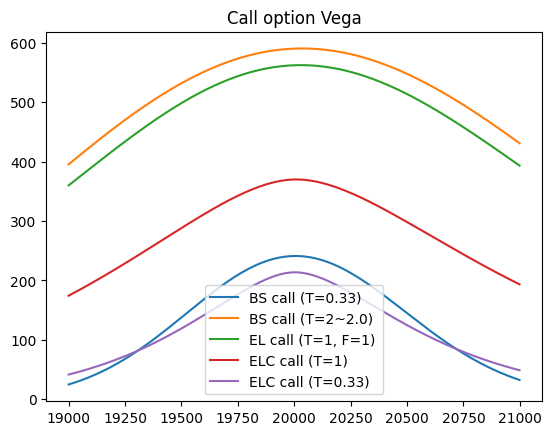

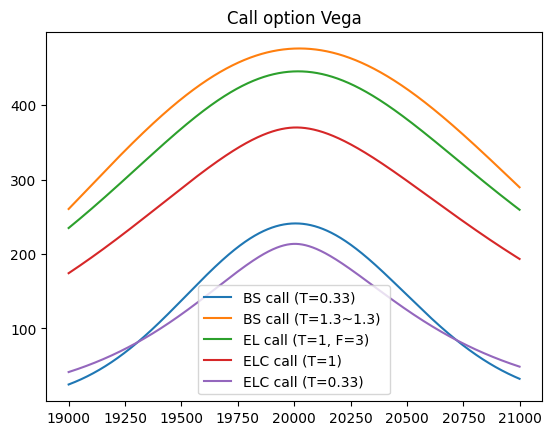

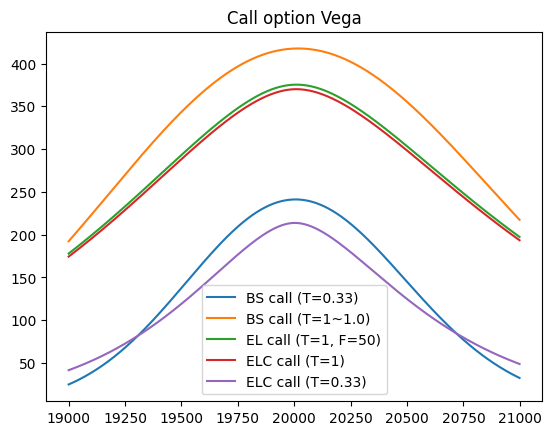

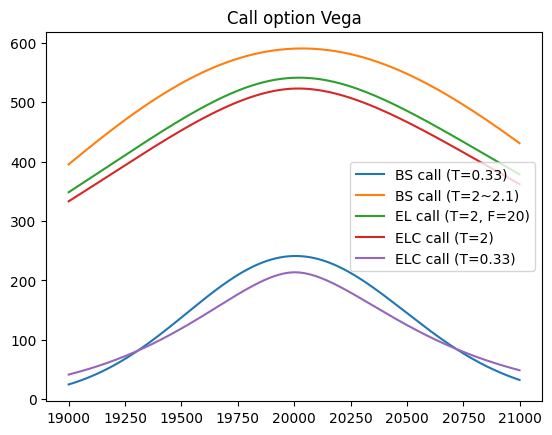

In [23]:
for P in [P1, P2, P3, P4]:
    BS_T = EL.replicate(P.EL_T, P.EL_F, 20000, 20000, 0.8, int(P.EL_F * 100))[0]
    fig, ax = plt.subplots()
    ax.plot(
        np.arange(19000, 21000),
        BS.vega(np.arange(19000, 21000), 20000, 0.8, 1 / 3 / 365),
        label=f"BS call (T={0.33}) ",
    )
    ax.plot(
        np.arange(19000, 21000),
        BS.vega(np.arange(19000, 21000), 20000, 0.8, P.BS_T / 365),
        label=f"BS call (T={P.BS_T}~{round(BS_T, 1)}) ",
    )
    ax.plot(
        np.arange(19000, 21000),
        [
            (
                EL.replicate(P.EL_T, P.EL_F, S, 20000, 0.8 + 0.01, int(P.EL_F * 100))[1]
                - EL.replicate(P.EL_T, P.EL_F, S, 20000, 0.8 - 0.01, int(P.EL_F * 100))[
                    1
                ]
            )
            / 0.02
            for S in np.arange(19000, 21000)
        ],
        label=f"EL call (T={P.EL_T}, F={P.EL_F})",
    )
    ax.plot(
        np.arange(19000, 21000),
        ELC.vega(P.EL_T, np.arange(19000, 21000), 20000, 0.8),
        label=f"ELC call (T={P.EL_T})",
    )
    ax.plot(
        np.arange(19000, 21000),
        ELC.vega(1 / 3, np.arange(19000, 21000), 20000, 0.8),
        label=f"ELC call (T={0.33})",
    )

    ax.legend()
    ax.set_title("Call option Vega")

    plt.show()